In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils

In [6]:
competitions = api.cached_worldrowing_records(
    'competition', 
    filter=(
        ('Year', tuple(range(2016, 2022))),
        ('IsFisa', 1)
    )
)

In [19]:
competition_races, errors = utils.map_concurrent(
    api.get_competition_races,
    dict(
        zip(
            competitions.index, 
            zip(competitions.index)
        )
    )
)
races = pd.concat(
    competition_races, axis=0,
    names=['competitionId', 'id']
).reset_index(0)
races

  0%|          | 0/122 [00:00<?, ?it/s]

In [53]:
competition_events, errors = utils.map_concurrent(
    api.get_competition_events,
    dict(
        zip(
            competitions.index, 
            zip(competitions.index)
        )
    )
)
events = pd.concat(
    competition_events, axis=0,
    names=['competitionId', 'id']
).reset_index(0, drop=True)
events

  0%|          | 0/122 [00:00<?, ?it/s]

ValueError: cannot insert competitionId, already exists

In [35]:
from tqdm.auto import tqdm

In [55]:
race_live_data, errors = utils.map_concurrent(
    livetracker.get_race_livetracker,
    {rid: (rid,) for rid in races.index},
    max_workers=10, 
#     raise_on_err=True
)

  0%|          | 0/5254 [00:00<?, ?it/s]

In [61]:
data_store = 'live_tracker.h5'

In [67]:
competitions

,competitionTypeId,venueId,CompetitionCode,DisplayName,Year,StartDate,EndDate,EntryDeadlineDate,IsFisa,HasResults
id,,,,,,,,,,
0029c3b2-ce71-431a-b250-fdf503cc66c6,0df896fd-4d8a-48c4-9767-5d3bb07b4274,7f64e56e-9477-42de-813c-5158131e4076,ERU23CH_2018_1,2018 European Rowing Under 23 Championships,2018,2018-09-01,2018-09-02,None,1,NaN
01c9196f-3187-4af0-8630-6643ee48b0a6,765733fd-a689-4ee8-9bbe-12c32e7d307e,5eab4145-3af5-4cf3-bdab-7ce7b15946eb,WCp2_2019_1,2019 World Rowing Cup II,2019,2019-06-21,2019-06-23,None,1,1.0
06104d50-2fad-4618-96a9-005448e08373,602ef0cd-de70-4e7e-a6af-9b9c85342a28,63b354f8-a132-4315-9dfc-0367d73075b8,FOQR_2019_1,2019 FISA African Olympic and Paralympic Quali...,2019,2019-10-10,2019-10-12,None,1,NaN
0a0567f8-c88e-499e-9f19-7bed485c0047,a99cd5f6-ab8d-473d-8d56-87a0740a5f38,9f963eb0-d8f9-4a0d-9d08-798a08451ec1,PG2020,2020 Paralympic Games Regatta,2021,2021-08-27,2021-08-29,None,1,1.0
0aa744f5-4224-4f19-8ee4-37bc644ba61a,6bccc957-6b1e-499c-b17a-93b3866bd313,9f963eb0-d8f9-4a0d-9d08-798a08451ec1,JWCH_2019_1,2019 World Rowing Junior Championships,2019,2019-08-07,2019-08-11,None,1,1.0
...,...,...,...,...,...,...,...,...,...,...
f7f24e20-99c9-49af-972b-6bc7089386da,765733fd-a689-4ee8-9bbe-12c32e7d307e,07e5d557-51df-46d5-b122-24fc391931f7,WCp2_2020_1,2020 World Rowing Cup II,2020,2020-05-01,2020-05-03,None,1,1.0
fd250598-5041-48a5-9ac1-590221f70d4a,b7f35f8f-63d2-42b8-a705-1172404b36b5,cb00114f-de8c-414d-93f4-5b2a60ec3a49,YOG_2018_1,2018 Youth Olympic Games,2018,2018-10-06,2018-10-11,None,1,1.0
fe0db63a-247a-4e84-95a8-09a266818c43,d140f900-ebba-4d76-ad17-41ab15bd2b37,5eab4145-3af5-4cf3-bdab-7ce7b15946eb,ECH_2020_1,2020 European Rowing Championships,2020,2020-10-09,2020-10-11,None,1,1.0


In [66]:
with pd.HDFStore(data_store) as store:
    store['competitions'] = competitions
    store['events'] = events
    store['races'] = races

/home/matthew/venv/concr38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['competitionTypeId', 'venueId', 'CompetitionCode', 'DisplayName',
       'Year', 'EntryDeadlineDate'],
      dtype='object')]

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/matthew/venv/concr38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['competitionId', 'eventId', 'racePhaseId', 'raceStatusId', 'genderId',
       'RscCode', 'DisplayName', 'RaceNr', 'IsStarted', 'DateString',
       'Progression', 'RescheduledFrom'],
      dtype='object')]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
with pd.HDFStore(data_store) as store:
    for race_id, live_data in race_live_data.items():
        if len(live_data):
            race = races.loc[race_id]
            key = "/".join([
                'livetracker', 
                competitions.DisplayName[race.competitionId],
                events.DisplayName[race.eventId],
                race.DisplayName,
            ])
            store[key] = live_data

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '2021 World Rowing Cup I'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Men's Four"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Men's Four Test Race"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access t

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Lightweight Women's Single Sculls Final A"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Lightweight Men's Double Sculls"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Lightweight Men's Double Sculls Final B"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Men's Pair Final FA"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Single Sculls Repechage"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Single Sculls Final A"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use 

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Lightweight Men's Single Sculls Final C"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Lightweight Men's Single Sculls Final B"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Lightweight Men's Single Sculls Semifinal A"; it does not match the pattern ``^[a-zA-Z_][a-z

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Lightweight Men's Double Sculls Final C"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Lightweight Women's Double Sculls Preliminary X1"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Men's Double Sculls Heat 4"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'PR2 Mixed Double Sculls'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'PR2 Mixed Double Sculls Preliminary X1'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'PR2 Mixed Double Sculls Final A'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Four Heat H2"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Four Repechage 1"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Four Repechage 2"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural nam

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Quadruple Sculls Heat H2"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Quadruple Sculls Repechage 2"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Quadruple Sculls Final B"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you wil

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Eight Final A"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '2021 World Rowing Final Olympic Qualification Regatta'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Men's Quadruple Sculls Repechage"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; y

/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Eight Preliminary Race"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '2021 World Rowing European Olympic and Paralympic Qualification Regatta'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/matthew/venv/concr38/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: "Women's Single Sculls Repechage R2"; it does not match the pattern ``

In [77]:
race_live_data = {
    k: live_data for k, live_data in race_live_data.items()
    if len(live_data)
}
len(race_live_data)

378

(0.0, 2.0)

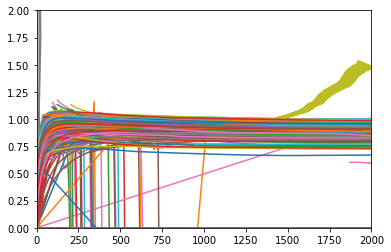

In [79]:
for race_id, live_data in race_live_data.items():
    plt.plot(
        live_data.distanceTravelled,
        live_data.PGMT
    )
    
plt.xlim(0, 2000)
plt.ylim(0, 2)

In [56]:
from collections import Counter

In [75]:
live_data_races = pd.DataFrame([
    (
        race.DisplayName,
        events.DisplayName[race.eventId],
        competitions.DisplayName[race.competitionId]
    )
    for i, race in races.iterrows()
    if len(race_live_data.get(race.name,()))
])
live_data_races.columns = ['race', 'event', 'competition']
live_data_races

,race,event,competition
0,Lightweight Women's Double Sculls Test Race,Lightweight Women's Double Sculls,2021 World Rowing Cup I
1,Lightweight Women's Double Sculls Final A,Lightweight Women's Double Sculls,2021 World Rowing Cup I
2,Men's Four Test Race,Men's Four,2021 World Rowing Cup I
3,Men's Four Final A,Men's Four,2021 World Rowing Cup I
4,Men's Single Sculls Heat 1,Men's Single Sculls,2021 World Rowing Cup I
...,...,...,...
373,Men's Single Sculls Semifinal SA/B 2,Men's Single Sculls,2021 World Rowing European Olympic and Paralym...
374,Men's Single Sculls Final FC,Men's Single Sculls,2021 World Rowing European Olympic and Paralym...
375,Men's Single Sculls Final FB,Men's Single Sculls,2021 World Rowing European Olympic and Paralym...
376,Men's Single Sculls Final FA,Men's Single Sculls,2021 World Rowing European Olympic and Paralym...


In [80]:
race

competitionId      fe0db63a-247a-4e84-95a8-09a266818c43
eventId            bbd437f2-27e7-4e4a-87b4-82723b27bae4
racePhaseId        e0fc3320-cd66-43af-a5b5-97afd55b2971
raceStatusId       182f6f15-8e78-41c3-95b3-8b006af2c6a1
genderId           5beae5a3-10e4-4d33-96e5-c1a9f612dd54
RscCode              ROWMSCULL2-L----------FNL-000300--
DisplayName                                          FC
RaceNr                                               64
IsStarted                                          None
Date                                2020-10-10 09:35:00
DateString                    2020-10-10 09:35:00+02:00
Progression                                        None
Rescheduled                                         0.0
RescheduledFrom                                    None
Name: 1551fe0a-c325-4caf-9840-4b2083ebd0ff, dtype: object

In [123]:
race

competitionId      fe0db63a-247a-4e84-95a8-09a266818c43
eventId            bbd437f2-27e7-4e4a-87b4-82723b27bae4
racePhaseId        e0fc3320-cd66-43af-a5b5-97afd55b2971
raceStatusId       182f6f15-8e78-41c3-95b3-8b006af2c6a1
genderId           5beae5a3-10e4-4d33-96e5-c1a9f612dd54
RscCode              ROWMSCULL2-L----------FNL-000300--
DisplayName                                          FC
RaceNr                                               64
IsStarted                                          None
Date                                2020-10-10 09:35:00
DateString                    2020-10-10 09:35:00+02:00
Progression                                        None
Rescheduled                                         0.0
RescheduledFrom                                    None
Name: 1551fe0a-c325-4caf-9840-4b2083ebd0ff, dtype: object

In [125]:
api.get_worldrowing_data(
    'boat', '43564939-ab16-4041-a8fb-222caa9a15e1'
)

{'id': '43564939-ab16-4041-a8fb-222caa9a15e1',
 'eventId': '50e25676-8050-475b-956a-2964fa2f0015',
 'countryId': '8fb56115-588a-47c1-90ca-8dbad89dd251',
 'coachId': 'dcd0b858-d381-4225-8be0-4e695a2b98a8',
 'OVRCode': '38421',
 'DisplayName': 'FRA',
 'finalRank': 18,
 'finalRankIndex': None,
 'clubName': None}

In [153]:
dict(())

{}

In [192]:
api.ge

,CompetitionType,BoatClass,ResultTime,Competition,Venue,Event,EventId,Race,RaceId,Country,Date
0,EliteECH,LM4x,0 days 00:05:52.060000,2021 European Rowing Championships,"Varese/Varese, Italy",Lightweight Men's Quadruple Sculls,1978b7b6-822d-4052-af23-50f8fd69c7b1,FA,5c875f7b-f629-49ac-b4bc-42f7ea07fc35,Italy,2021-04-11 12:06:00Z
1,EliteECH,LW4x,0 days 00:06:32.910000,2020 European Rowing Championships,"Malta/Poznan, Poland",Lightweight Women's Quadruple Sculls,9e3ca60d-b1be-40c1-9d7a-4a87faacc015,X1,e32e5384-f544-4e19-92d8-cc2af7a5645d,Italy,2020-10-10 12:15:00Z
2,EliteECH,W4-,0 days 00:06:24.620000,2020 European Rowing Championships,"Malta/Poznan, Poland",Women's Four,2b6bc359-6619-4fa1-86d7-27999efe4796,H1,27d2ec8f-35fd-4f2e-9c1c-e4c0920f9bc1,Netherlands,2020-10-09 11:05:00Z
3,EliteECH,M4x,0 days 00:05:35.750000,2019 European Rowing Championships,"Rotsee/Lucerne, Switzerland",Men's Quadruple Sculls,d12cecf8-ca7a-42a1-b9ad-398155ed9c26,FA,221cd075-a205-4ad1-a795-108ade30a126,Netherlands,2019-06-02 14:11:00Z
4,EliteECH,LW1x,0 days 00:07:32.450000,2019 European Rowing Championships,"Rotsee/Lucerne, Switzerland",Lightweight Women's Single Sculls,2c3964df-b0c0-4a74-b939-2606e9502bba,FA,5f0be4f1-2fc5-40cb-88c3-768bba974474,Italy,2019-06-02 13:39:00Z
...,...,...,...,...,...,...,...,...,...,...,...
142,U,BLM2-,0 days 00:06:26.470000,2016 World Rowing Under 23 Championships,"Rotterdam, Netherlands",U23 Lightweight Men's Pair,6d1a3da7-05e2-40a8-980e-9bc58bc0a6bc,FA,8ecf7cbf-108a-4683-839e-e5fc393f1c5a,Switzerland,2016-08-25 16:45:00Z
143,U,BM4x,0 days 00:05:39.620000,2011 Under 23 World Rowing Championships - Bos...,"Bosbaan/Amsterdam, Netherlands",U23 Men's Quadruple Sculls,411c02f4-fa23-40e6-b85a-ad6ed122fef2,FA,2723fef4-0056-42a5-bc30-c61746c30f5d,Ukraine,2011-07-24 13:54:00Z
144,U,BLM4-,0 days 00:05:54.120000,2011 Under 23 World Rowing Championships - Bos...,"Bosbaan/Amsterdam, Netherlands",U23 Lightweight Men's Four,5f501870-30cc-4c0e-9297-3f958c2308de,FA,c99966ac-9d3d-49d8-838b-8cb88f80cadc,Italy,2011-07-24 12:00:00Z
145,U,BM4+,0 days 00:06:03.010000,2011 Under 23 World Rowing Championships - Bos...,"Bosbaan/Amsterdam, Netherlands",U23 Men's Coxed Four,fd23a511-1d92-4330-95d8-e6f216077608,FA,f22add2a-ac46-4ba0-9ff6-34f815c5c5c3,Serbia,2011-07-23 11:12:00Z


In [175]:
race_data = (api.cached_worldrowing_data(
    'race', #race.eventId,
    filter=(
#         ('event.competitionId', race.competitionId),
#         ('eventId', race.eventId),
        ('id', race.name),
    ),
    include='raceBoats.raceBoatIntermediates.distance,event',
))
len(race_data), race_data[0]

(1,
 {'id': '1551fe0a-c325-4caf-9840-4b2083ebd0ff',
  'eventId': 'bbd437f2-27e7-4e4a-87b4-82723b27bae4',
  'racePhaseId': 'e0fc3320-cd66-43af-a5b5-97afd55b2971',
  'raceStatusId': '182f6f15-8e78-41c3-95b3-8b006af2c6a1',
  'genderId': '5beae5a3-10e4-4d33-96e5-c1a9f612dd54',
  'RscCode': 'ROWMSCULL2-L----------FNL-000300--',
  'DisplayName': 'FC',
  'RaceNr': '64',
  'IsStarted': None,
  'Date': '2020-10-10 09:35:00',
  'DateString': '2020-10-10T09:35:00+02:00',
  'Progression': None,
  'Rescheduled': 0,
  'RescheduledFrom': None,
  'event': {'id': 'bbd437f2-27e7-4e4a-87b4-82723b27bae4',
   'competitionId': 'fe0db63a-247a-4e84-95a8-09a266818c43',
   'competitionTypeId': 'd140f900-ebba-4d76-ad17-41ab15bd2b37',
   'boatClassId': '4458faa3-d55b-495f-8018-51250f82e5ba',
   'RscCode': 'ROWMSCULL2-L----------------------',
   'DisplayName': "Lightweight Men's Double Sculls"},
  'raceBoats': [{'id': '2f0d41fc-5638-4598-9b4a-593f9be6e802',
    'boatId': '09357859-fb85-4aac-a200-30aa839de97e',
  

In [ ]:
RACEINTERMEDIATE_FIELDS = {
    'id': 'id',
    'raceId': 'raceId',
    'boatId': 'raceBoatId',
    'distanceId': 'distanceId',
    'Rank': 'Rank',
    'ResultTime': 'ResultTime',
}
def _extract(record, fields):
    return {
        k: record[item] for k, item in fields.items()
    }

In [194]:
api.get_intermediate_results(event_id=race.eventId)

boatId  \
raceId                               raceBoatId                           id                                                                           
2f1c840e-be5d-42b5-a104-48c47ae99965 1a4a4566-d4e4-4e91-b9f6-699206f59d3b 2ec351bf-5dff-48c0-a636-46297013c561  1a4a4566-d4e4-4e91-b9f6-699206f59d3b   
                                                                          d3de31cb-0633-47e6-bbae-c2ceb911dfb3  1a4a4566-d4e4-4e91-b9f6-699206f59d3b   
                                                                          f72cb5c8-f390-4b2a-b04e-84ae7c96ba7e  1a4a4566-d4e4-4e91-b9f6-699206f59d3b   
                                     26a4c7ed-0978-4c40-a62e-d225cd859ba1 30014471-14bd-431b-b18e-fff51ca12bf4  26a4c7ed-0978-4c40-a62e-d225cd859ba1   
                                                                          b71ab0de-e41a-445a-b048-84c19f8899a3  26a4c7ed-0978-4c40-a62e-d225cd859ba1   
...                                                                                                                                              ...   
db189416-90c2-40ee-8f4a-c78112f2f11e c2b78e7b-d3d9-44a5-be14-0267a9582c38 3bcd3d4b-b744-4c95-9454-6926c3ded8c9  c2b78e7b-d3d9-44a5-be14-0267a9582c38   
                                                                          4755679c-779f-49e6-97f8-90bce172d48a  c2b78e7b-d3d9-44a5-be14-0267a9582c38   
                                     e1d26e96-cbc3-496a-b4e9-30992a6a297d 1bfa11bf-e31b-4e48-a332-8031ca2c091a  e1d26e96-cbc3-496a-b4e9-30992a6a297d   
                                                                          5c62b5d2-28cb-46d8-9149-e211f478da40  e1d26e96-cbc3-496a-b4e9-30992a6a297d   
                                                                          d4c3acd4-dba2-47f8-986c-c7e477987942  e1d26e96-cbc3-496a-b4e9-30992a6a297d   

                                                                                                               Country  \
raceId                               raceBoatId                           id                                             
2f1c840e-be5d-42b5-a104-48c47ae99965 1a4a4566-d4e4-4e91-b9f6-699206f59d3b 2ec351bf-5dff-48c0-a636-46297013c561     GER   
                                                                          d3de31cb-0633-47e6-bbae-c2ceb911dfb3     GER   
                                                                          f72cb5c8-f390-4b2a-b04e-84ae7c96ba7e     GER   
                                     26a4c7ed-0978-4c40-a62e-d225cd859ba1 30014471-14bd-431b-b18e-fff51ca12bf4     BEL   
                                                                          b71ab0de-e41a-445a-b048-84c19f8899a3     BEL   
...                                                                                                                ...   
db189416-90c2-40ee-8f4a-c78112f2f11e c2b78e7b-d3d9-44a5-be14-0267a9582c38 3bcd3d4b-b744-4c95-9454-6926c3ded8c9     BEL   
                                                                          4755679c-779f-49e6-97f8-90bce172d48a     BEL   
                                     e1d26e96-cbc3-496a-b4e9-30992a6a297d 1bfa11bf-e31b-4e48-a332-8031ca2c091a     POL   
                                                                          5c62b5d2-28cb-46d8-9149-e211f478da40     POL   
                                                                          d4c3acd4-dba2-47f8-986c-c7e477987942     POL   

                                                                                                                Rank  \
raceId                               raceBoatId                           id                                           
2f1c840e-be5d-42b5-a104-48c47ae99965 1a4a4566-d4e4-4e91-b9f6-699206f59d3b 2ec351bf-5dff-48c0-a636-46297013c561     1   
                                                                          d3de31cb-0633-47e6-bbae-c2ceb911dfb3     1   
                                                                          f72cb5c8-f390-4b2a-b04e-

In [189]:
debug

> /home/matthew/venv/concr38/lib/python3.8/site-packages/pandas/core/frame.py(4727)set_index()
   4725 
   4726         if missing:
-> 4727             raise KeyError(f"None of {missing} are in the columns")
   4728 
   4729         if inplace:

ipdb> results
*** NameError: name 'results' is not defined
ipdb> up
> /mnt/c/Users/matthew/Source/rowing/world_rowing/api.py(217)get_intermediate_results()
    215 
    216     if len(results):
--> 217         results.set_index(['raceId', 'raceBoatId', 'id'], inplace=True)
    218         results.ResultTime = pd.to_timedelta(results.ResultTime)
    219     return results

ipdb> result
*** NameError: name 'result' is not defined
ipdb> results
                                       id  \
0    2ec351bf-5dff-48c0-a636-46297013c561   
1    d3de31cb-0633-47e6-bbae-c2ceb911dfb3   
2    f72cb5c8-f390-4b2a-b04e-84ae7c96ba7e   
3    30014471-14bd-431b-b18e-fff51ca12bf4   
4    b71ab0de-e41a-445a-b048-84c19f8899a3   
..                                    

In [166]:
api.get_race_results(competition_id=race.competitionId)

(('event.competitionId', 'fe0db63a-247a-4e84-95a8-09a266818c43'),)


boatId  \
raceId                               id                                                                           
001bad53-16e8-4bd5-9d89-86250fe0d261 0c28b539-66c7-4112-a8ca-1e79906e8105  43564939-ab16-4041-a8fb-222caa9a15e1   
                                     3cf59f3b-093d-4655-9db0-eb565681afea  8d0354ce-5ad1-4ed4-9c19-a008c24e4581   
                                     4264d318-c39c-4b6c-8de1-d77587c23445  fb8188ec-f646-46fc-85c1-c9c7222c0ad9   
                                     94a76f91-b912-4f0b-ada3-e73e6179a1ad  b9430c01-6508-44d2-a2c7-da8dc034be98   
                                     a695e254-4353-4e45-bc1b-71370c953d0f  b7b42cea-056a-46d5-9c40-1c291892cfc8   
...                                                                                                         ...   
f684d3eb-673c-4237-acd1-8fb2b61ffb24 1e6e5a96-d84e-4e71-94fb-c1cd7ede472d  9488c844-c90b-499e-9827-4357eb85557c   
                                     61a9aa54-3dcf-4064-b1da-e6b45d947527  b3917653-1c6e-48a0-ad7e-5cb0de7bb0d5   
                                     7c231cae-4cfd-440e-a776-43719d034726  43e00fe5-5b3c-4dfc-b4d7-18bd2df44bf0   
                                     ad58cc9d-6abf-4315-a348-64702b736315  386751d3-9707-4cdc-ab96-75c404568de3   
                                     c9891ec4-baf9-48fb-8f82-9f622fd7cb05  b9430c01-6508-44d2-a2c7-da8dc034be98   

                                                                          Country  \
raceId                               id                                             
001bad53-16e8-4bd5-9d89-86250fe0d261 0c28b539-66c7-4112-a8ca-1e79906e8105     FRA   
                                     3cf59f3b-093d-4655-9db0-eb565681afea     ITA   
                                     4264d318-c39c-4b6c-8de1-d77587c23445     CRO   
                                     94a76f91-b912-4f0b-ada3-e73e6179a1ad     SWE   
                                     a695e254-4353-4e45-bc1b-71370c953d0f     FIN   
...                                                                           ...   
f684d3eb-673c-4237-acd1-8fb2b61ffb24 1e6e5a96-d84e-4e71-94fb-c1cd7ede472d     HUN   
                                     61a9aa54-3dcf-4064-b1da-e6b45d947527     ESP   
                                     7c231cae-4cfd-440e-a776-43719d034726     EST   
                                     ad58cc9d-6abf-4315-a348-64702b736315     POL   
                                     c9891ec4-baf9-48fb-8f82-9f622fd7cb05     SWE   

                                                                           Rank  \
raceId                               id                                           
001bad53-16e8-4bd5-9d89-86250fe0d261 0c28b539-66c7-4112-a8ca-1e79906e8105     6   
                                     3cf59f3b-093d-4655-9db0-eb565681afea     5   
                                     4264d318-c39c-4b6c-8de1-d77587c23445     2   
                                     94a76f91-b912-4f0b-ada3-e73e6179a1ad     3   
                                     a695e254-4353-4e45-bc1b-71370c953d0f     4   
...                                                                         ...   
f684d3eb-673c-4237-acd1-8fb2b61ffb24 1e6e5a96-d84e-4e71-94fb-c1cd7ede472d     5   
                                     61a9aa54-3dcf-4064-b1da-e6b45d947527     2   
                                     7c231cae-4cfd-440e-a776-43719d034726     4   
                                     ad58cc9d-6abf-4315-a348-64702b736315     1   
                                     c9891ec4-baf9-48fb-8f82-9f622fd7cb05     3   

                                                                           Lane  \
raceId                               id                                           
001bad53-16e8-4bd5-9d89-86250fe0d261 0c28b539-66c7-4112-a8ca-1e79906e8105     4   
                                     3cf59f3b-093d-4655-9db0-eb565681afea     6   
                                     4264d318-c39c-4b6c-8de1-d77587c23445     5   
        

In [136]:
RACEFIELDS = {
    1:1,
}
RACEBOATFIELDS = {
    'id': 'id',
    'raceId': 'raceId',
    'boatId': 'boatId',
    'Country': 'DisplayName',
    'Rank': 'Rank',
    'Lane': 'Lane',
    'ResultTime': 'ResultTime',
}
def _extract(record, fields):
    return {
        k: record[item] for k, item in fields.items()
    }



In [147]:
race_results = pd.DataFrame.from_records([
    _extract(race_boat, RACEBOATFIELDS)
    for race in race_data
    for race_boat in race['raceBoats']
    if race_boat['Rank']
])

In [149]:
race_results

,id,raceId,boatId,Country,Rank,Lane,ResultTime
0,0c28b539-66c7-4112-a8ca-1e79906e8105,001bad53-16e8-4bd5-9d89-86250fe0d261,43564939-ab16-4041-a8fb-222caa9a15e1,FRA,6,4,00:07:04.84
1,3cf59f3b-093d-4655-9db0-eb565681afea,001bad53-16e8-4bd5-9d89-86250fe0d261,8d0354ce-5ad1-4ed4-9c19-a008c24e4581,ITA,5,6,00:07:03.74
2,4264d318-c39c-4b6c-8de1-d77587c23445,001bad53-16e8-4bd5-9d89-86250fe0d261,fb8188ec-f646-46fc-85c1-c9c7222c0ad9,CRO,2,5,00:07:01.21
3,94a76f91-b912-4f0b-ada3-e73e6179a1ad,001bad53-16e8-4bd5-9d89-86250fe0d261,b9430c01-6508-44d2-a2c7-da8dc034be98,SWE,3,1,00:07:02.92
4,a695e254-4353-4e45-bc1b-71370c953d0f,001bad53-16e8-4bd5-9d89-86250fe0d261,b7b42cea-056a-46d5-9c40-1c291892cfc8,FIN,4,3,00:07:03.54
...,...,...,...,...,...,...,...
684,1e6e5a96-d84e-4e71-94fb-c1cd7ede472d,f684d3eb-673c-4237-acd1-8fb2b61ffb24,9488c844-c90b-499e-9827-4357eb85557c,HUN,5,1,00:07:12.81
685,61a9aa54-3dcf-4064-b1da-e6b45d947527,f684d3eb-673c-4237-acd1-8fb2b61ffb24,b3917653-1c6e-48a0-ad7e-5cb0de7bb0d5,ESP,2,4,00:07:03.53
686,7c231cae-4cfd-440e-a776-43719d034726,f684d3eb-673c-4237-acd1-8fb2b61ffb24,43e00fe5-5b3c-4dfc-b4d7-18bd2df44bf0,EST,4,2,00:07:12.47
687,ad58cc9d-6abf-4315-a348-64702b736315,f684d3eb-673c-4237-acd1-8fb2b61ffb24,386751d3-9707-4cdc-ab96-75c404568de3,POL,1,3,00:06:58.96


In [128]:
race_boat_intermediates = [
    {**race, **race_boat, **intermediate}
    for race in race_data
    for race_boat in race['raceBoats']
    for intermediate in race_boat['raceBoatIntermediates']
]

In [129]:
race_boat_intermediates[0]

{'id': '7886f5d9-5f25-420b-b876-8a1ddef87ab9',
 'eventId': '50e25676-8050-475b-956a-2964fa2f0015',
 'racePhaseId': 'e0fc3320-cd66-43af-a5b5-97afd55b2971',
 'raceStatusId': '182f6f15-8e78-41c3-95b3-8b006af2c6a1',
 'genderId': '5beae5a3-10e4-4d33-96e5-c1a9f612dd54',
 'RscCode': 'ROWMSCULL1------------FNL-000300--',
 'DisplayName': 'FRA',
 'RaceNr': '96',
 'IsStarted': None,
 'Date': '2020-10-10 12:35:00',
 'DateString': '2020-10-10T12:35:00+02:00',
 'Progression': None,
 'Rescheduled': 0,
 'RescheduledFrom': None,
 'event': {'id': '50e25676-8050-475b-956a-2964fa2f0015',
  'competitionId': 'fe0db63a-247a-4e84-95a8-09a266818c43',
  'competitionTypeId': 'd140f900-ebba-4d76-ad17-41ab15bd2b37',
  'boatClassId': '3f0d0a7d-92a6-4c53-90f5-7c8f01972964',
  'RscCode': 'ROWMSCULL1------------------------',
  'DisplayName': "Men's Single Sculls"},
 'raceBoats': [{'id': '0c28b539-66c7-4112-a8ca-1e79906e8105',
   'boatId': '43564939-ab16-4041-a8fb-222caa9a15e1',
   'countryId': '8fb56115-588a-47c1-90c

In [111]:
race_data = (api.get_worldrowing_data(
    'race',
    filter=(
        ('eventId', race.eventId),
    ),
    include='racePhase,raceBoats.raceBoatAthletes.person,raceBoats.raceBoatIntermediates.distance',
))

In [109]:
import json

In [113]:
print(json.dumps(
    race_data[0],
    indent=2
))

{
  "id": "1551fe0a-c325-4caf-9840-4b2083ebd0ff",
  "eventId": "bbd437f2-27e7-4e4a-87b4-82723b27bae4",
  "racePhaseId": "e0fc3320-cd66-43af-a5b5-97afd55b2971",
  "raceStatusId": "182f6f15-8e78-41c3-95b3-8b006af2c6a1",
  "genderId": "5beae5a3-10e4-4d33-96e5-c1a9f612dd54",
  "RscCode": "ROWMSCULL2-L----------FNL-000300--",
  "DisplayName": "FC",
  "RaceNr": "64",
  "IsStarted": null,
  "Date": "2020-10-10 09:35:00",
  "DateString": "2020-10-10T09:35:00+02:00",
  "Progression": null,
  "Rescheduled": 0,
  "RescheduledFrom": null,
  "racePhase": {
    "id": "e0fc3320-cd66-43af-a5b5-97afd55b2971",
    "DisplayName": "Final"
  },
  "raceBoats": [
    {
      "id": "2f0d41fc-5638-4598-9b4a-593f9be6e802",
      "boatId": "09357859-fb85-4aac-a200-30aa839de97e",
      "countryId": "0d062897-6a4a-4db0-9280-c6ab8d8aa1a2",
      "worldBestTimeId": null,
      "raceId": "1551fe0a-c325-4caf-9840-4b2083ebd0ff",
      "DisplayName": "FIN",
      "Rank": null,
      "Lane": 1,
      "WorldCupPoints": nu

In [99]:
len(race_data[0].raceBoats)

3

In [106]:
[i.ResultTime for i in race_data[0].raceBoats[0].raceBoatIntermediates]

['05:02:00.000',
 '01:41:01.000',
 '01:39:00.000',
 '01:37:01.000',
 '06:41:01.000',
 '01:43:00.000',
 '03:19:00.000']

In [107]:
len(race_data[0].raceBoats[0].raceBoatIntermediates)

7

In [84]:
import urllib

In [86]:
urllib.parse.unquote(
    'https://world-rowing-api.soticcloud.net/stats/api/race/db43c8f0-ac8b-4d7c-954f-69a1183bb665?include=racePhase%2CraceBoats.raceBoatAthletes.person%2CraceBoats.raceBoatIntermediates.distance&sortInclude%5BraceBoats.raceBoatIntermediates.ResultTime%5D=asc'
)

'https://world-rowing-api.soticcloud.net/stats/api/race/db43c8f0-ac8b-4d7c-954f-69a1183bb665?include=racePhase,raceBoats.raceBoatAthletes.person,raceBoats.raceBoatIntermediates.distance&sortInclude[raceBoats.raceBoatIntermediates.ResultTime]=asc'

In [76]:
live_data_races.competition.value_counts()

2021 European Rowing Championships                                         131
2021 World Rowing Cup II                                                    93
2021 World Rowing Final Olympic Qualification Regatta                       71
2021 World Rowing Cup I                                                     56
2021 World Rowing European Olympic and Paralympic Qualification Regatta     26
2020 European Rowing Championships                                           1
Name: competition, dtype: int64

In [ ]:
race_id = '9eff114b-1aac-4bda-b075-6a7df89c9eb6'
race_id = '9d397f56-8244-4095-a2a9-eefc71d4bfdf'
# race_id = 'f3a21c96-808f-42e9-8d35-d159a82016a8'
live_data = livetracker.get_race_livetracker(race_id)
live_data